In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [18]:
df = pd.read_csv('flights.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


### Data Understanding

In [19]:
df.shape

(271940, 20)

- So the dataset contains 271940 rows and 20 columns/features.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

In [21]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,269179.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.201134,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.400849,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


### Handling Missing Values

In [22]:
## Checking Missing Values
df.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

- Looks like there are some null "late departure" indicators. Departures are considered late if the delay is 15 minutes or more, so let's see the delays for the ones with a null late indicator:

In [23]:
df[df['DepDel15'].isnull()][['DepDel15','DepDelay']]

,DepDel15,DepDelay
171,NaN,0
359,NaN,0
429,NaN,0
545,NaN,0
554,NaN,0
...,...,...
271410,NaN,0
271607,NaN,0
271634,NaN,0
271671,NaN,0


- We can't see them all in this display, but it looks like they may all have delay of 0. Let's check by looking at the summary statistics for these records:

In [24]:
df[df['DepDel15'].isnull()]['DepDelay'].describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

- The min, max, and mean are all 0; so it seems that none of these were actually late departures. Let's replace the missing DepDel15 indicator with a 0 and confirm there are no more missing values.

In [25]:
df['DepDel15'] = df['DepDel15'].fillna(0)

In [26]:
df.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

In [27]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


### Checking Outliers
- View the distribution and summary statistics for the DepDelay(Departure Delay) and ArrDelay(Arrival Delay) columns.

In [28]:
# Function to show summary stats and distribution for a column
def show_distribution(data):
    # Get Statistics
    min_value = data.min()
    max_value = data.max()
    mean_value = data.mean()
    median_value = data.median()
    mode_value = data.mode()[0]
    print(f"{data.name} \nMinimum:{min_value} \nMaximum:{max_value} \nMean:{mean_value} \nMedian:{median_value} \nMode:{mode_value}")
    
    # Create Plots to see distribution and outliers
    fig, ax = plt.subplots(2,1,figsize=(14,7))
    # Histogram
    ax[0].hist(data)
    ax[0].set_ylabel('Frequency')
    
    ## Adding lines for min, max, mean, median and mode
    ax[0].axvline(x=min_value,color='gray',linestyle='dashed',linewidth=2)
    ax[0].axvline(x=mean_value,color='red',linestyle='dashed',linewidth=2)
    ax[0].axvline(x=median_value,color='green',linestyle='dashed',linewidth=2)
    ax[0].axvline(x=mode_value,color='yellow',linestyle='dashed',linewidth=2)
    ax[0].axvline(x=max_value,color='gray',linestyle='dashed',linewidth=2)
    
    # BoxPlot
    ax[1].boxplot(data,vert=False)
    ax[1].set_xlabel('Value')
    
    ## Title
    fig.suptitle(data.name)
    plt.show()

DepDelay 
Minimum:-63 
Maximum:1425 
Mean:10.350448628373906 
Median:-1.0 
Mode:-3


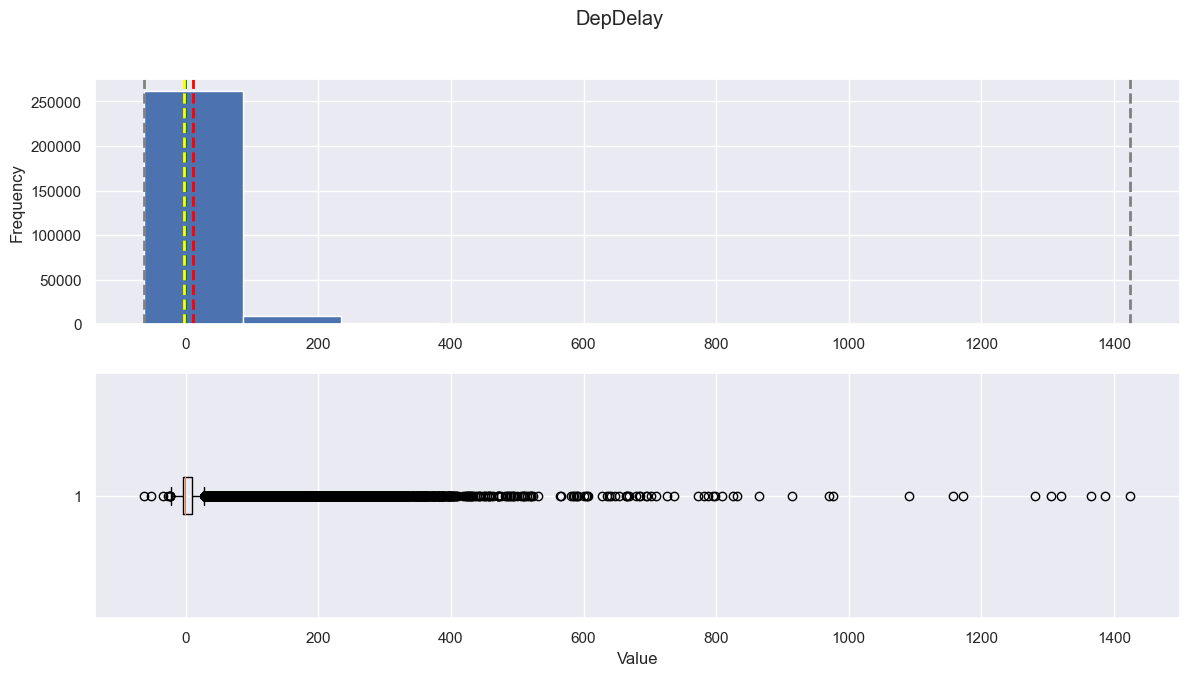

ArrDelay 
Minimum:-75 
Maximum:1440 
Mean:6.496649996322718 
Median:-3.0 
Mode:0


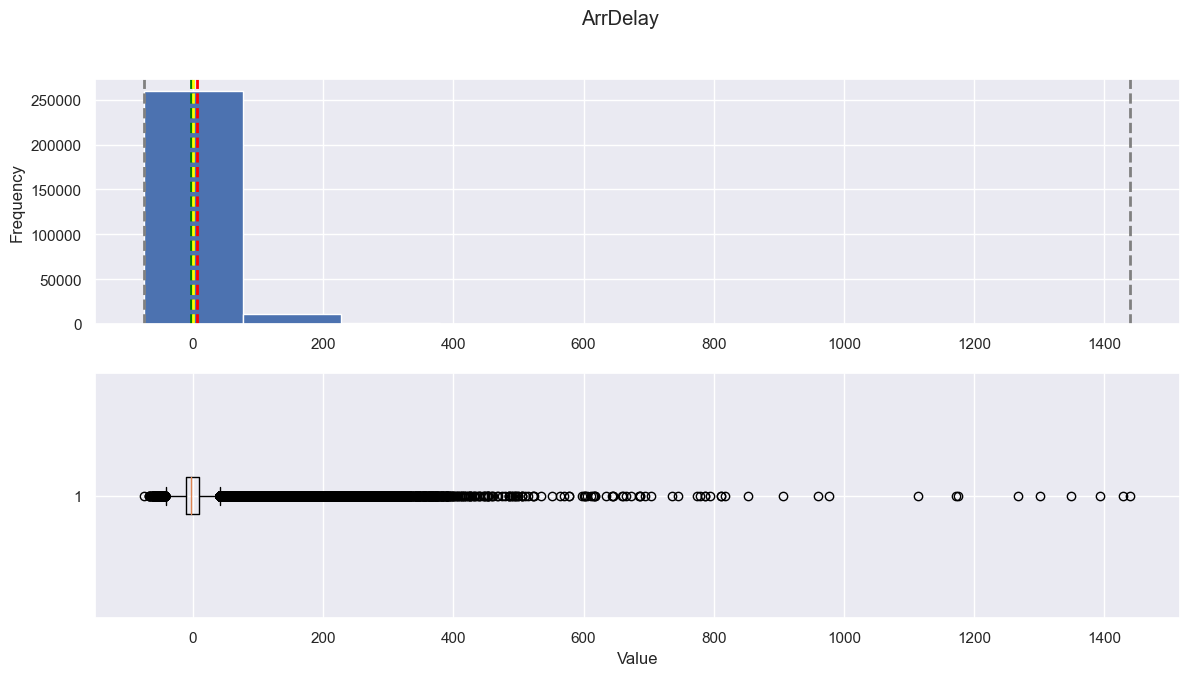

In [29]:
delayFields = ['DepDelay','ArrDelay']
for feature in delayFields:
    show_distribution(df[feature])

- There are a outliers at the lower and upper ends of both variables - particularly at the upper end.

- Let's trim the data so that we include only rows where the values for these fields are within the 1st and 90th percentile.

### Handling Outliers

In [30]:
# Trim outliers for ArrDelay based on 1% and 90% percentiles
# Trim outliers for ArrDelay based on 1% and 90% percentiles
ArrDelay_01pcntile = df.ArrDelay.quantile(0.01)
ArrDelay_90pcntile = df.ArrDelay.quantile(0.90)
df = df[df.ArrDelay < ArrDelay_90pcntile]
df = df[df.ArrDelay > ArrDelay_01pcntile]

# Trim outliers for DepDelay based on 1% and 90% percentiles
DepDelay_01pcntile = df.DepDelay.quantile(0.01)
DepDelay_90pcntile = df.DepDelay.quantile(0.90)
df = df[df.DepDelay < DepDelay_90pcntile]
df = df[df.DepDelay > DepDelay_01pcntile]

In [31]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0.0,1210,-3,0,0


DepDelay 
Minimum:-11 
Maximum:16 
Mean:-0.9216920012873314 
Median:-2.0 
Mode:-3


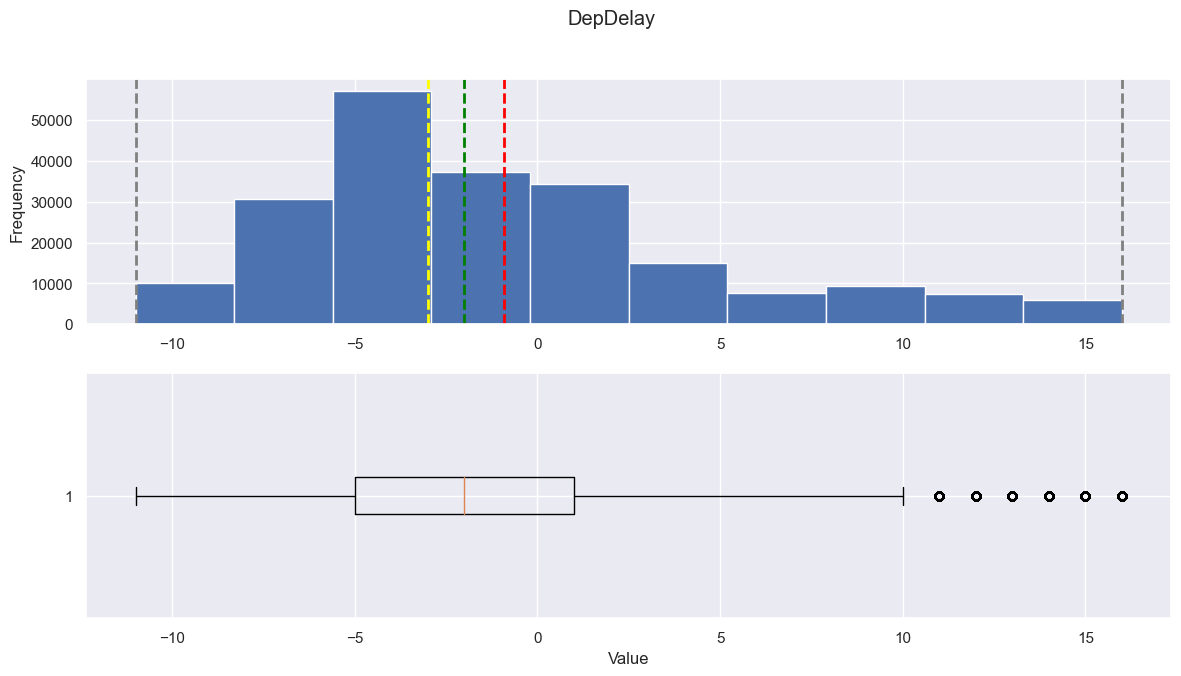

ArrDelay 
Minimum:-32 
Maximum:37 
Mean:-5.030275610199769 
Median:-6.0 
Mode:0


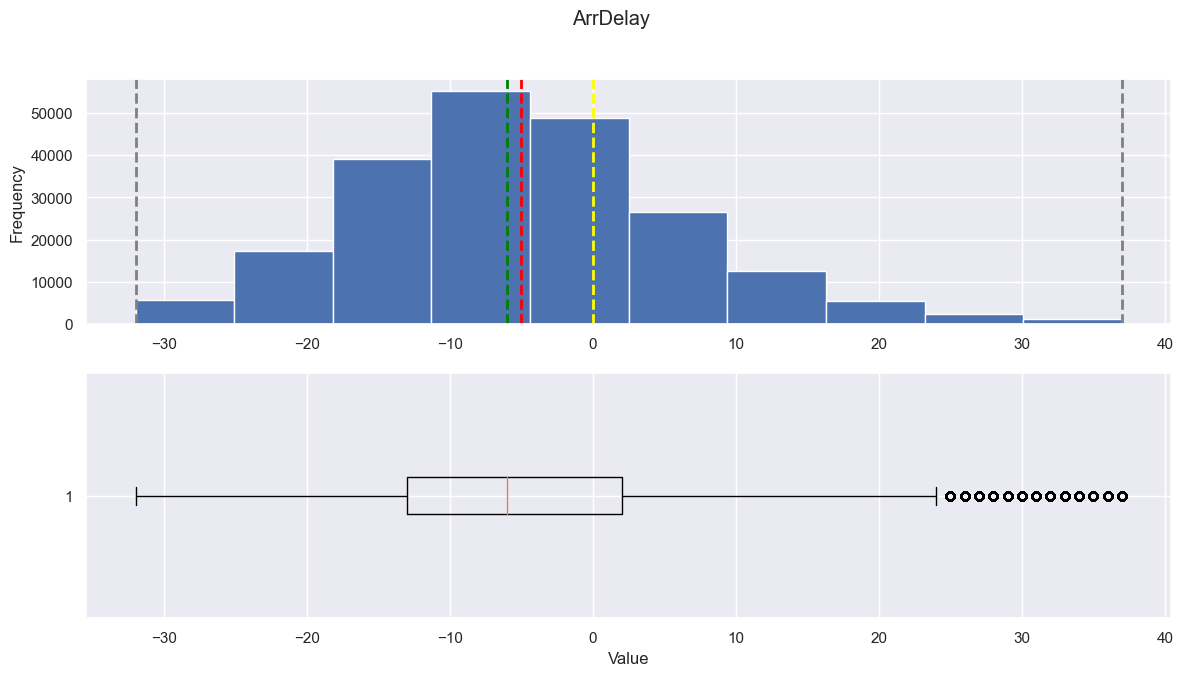

In [33]:
# View the revised distributions
for col in delayFields:
    show_distribution(df[col])

### Explore the Data

In [34]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214397.0,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000
mean,2013.0,7.018368,15.794703,3.902737,12757.827661,12726.276147,1278.223879,-0.921692,0.018116,1461.406596,-5.030276,0.068602,0.013228
std,0.0,2.006398,8.859118,1.997744,1510.058629,1506.251757,469.440262,5.708594,0.133371,485.676457,11.424280,0.252776,0.114249
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,850.000000,-5.000000,0.000000,1054.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1235.000000,-2.000000,0.000000,1445.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1655.000000,1.000000,0.000000,1845.000000,2.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,16.000000,1.000000,2359.000000,37.000000,1.000000,1.000000


What are the mean departure and arrival delays?

In [39]:
arr_delay_mean = df['ArrDelay'].mean()
dep_delay_mean = df['DepDelay'].mean()
print(f"The mean deapature delay is: {dep_delay_mean} and mean arrival delay is: {arr_delay_mean}.")

The mean deapature delay is: -0.9216920012873314 and mean arrival delay is: -5.030275610199769.


In [47]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0.0,1210,-3,0,0


How do the carriers compare in terms of arrival delay performance?

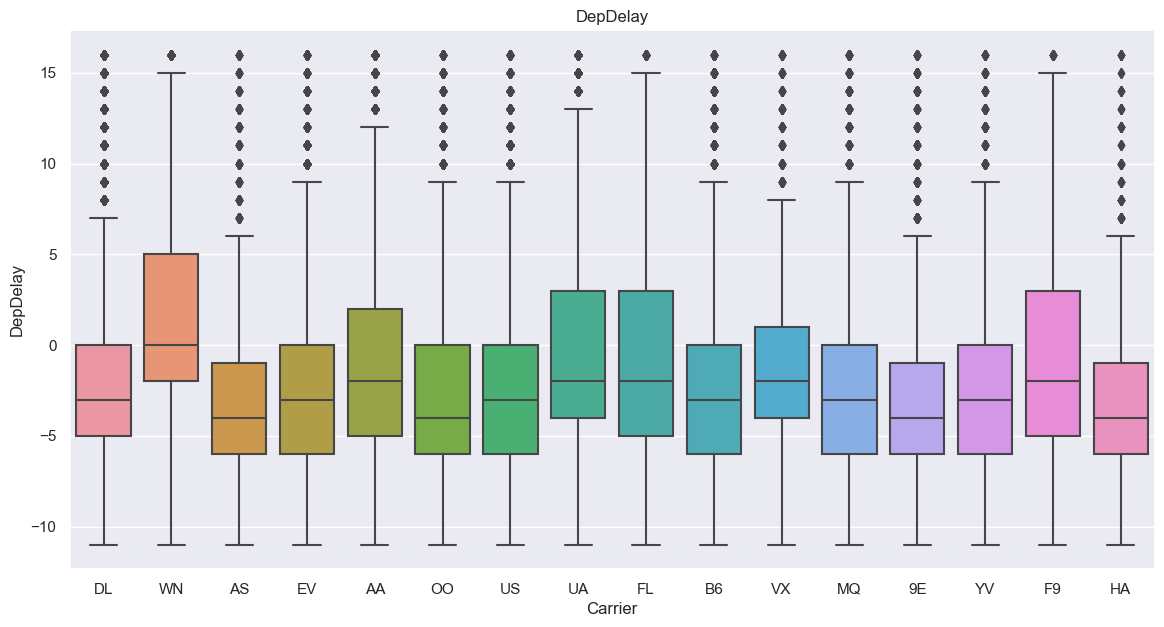

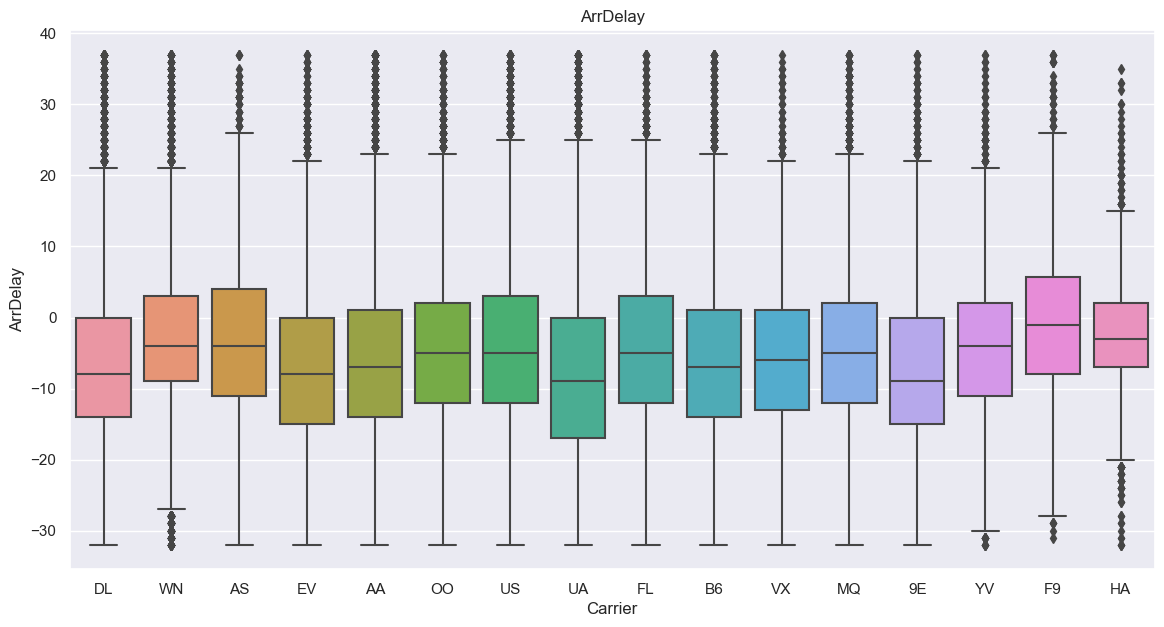

In [53]:
for feature in delayFields:
    plt.figure(figsize=(14,7))
    sns.boxplot(data=df,x='Carrier',y=feature)
    plt.title(feature)
    plt.show()

Are some days of the week more prone to arrival days than others?

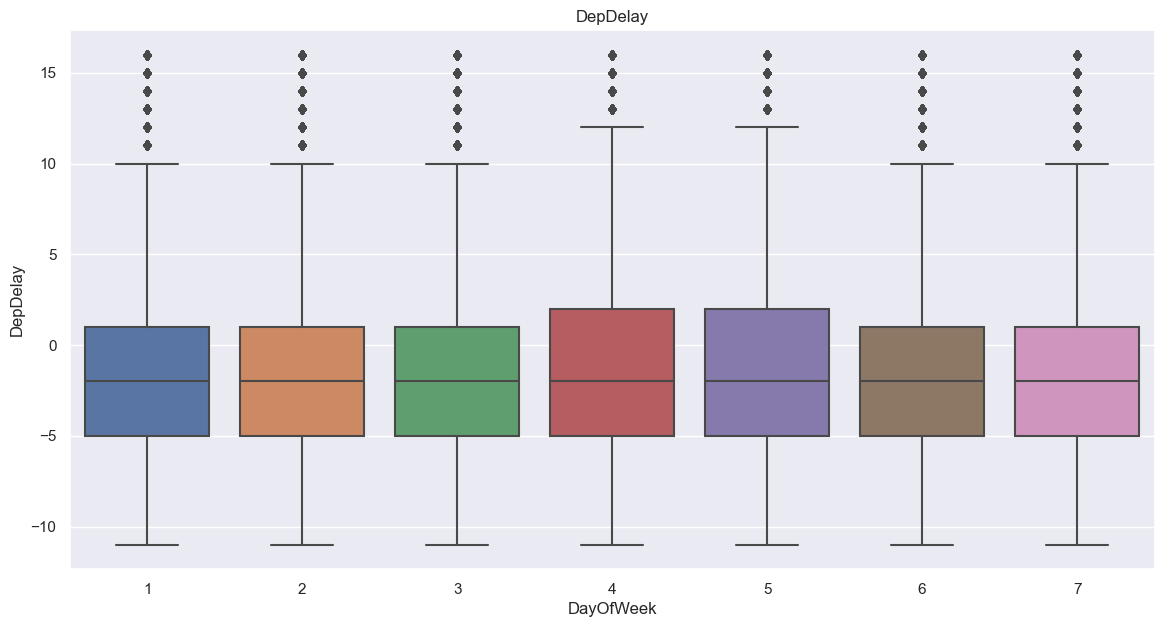

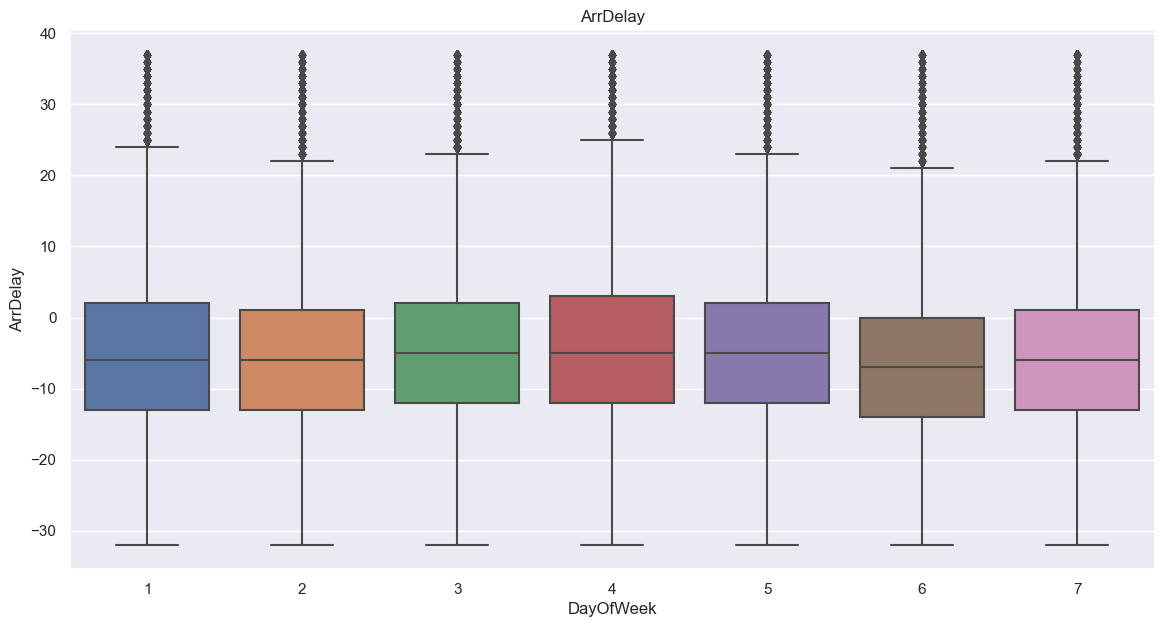

In [54]:
for feature in delayFields:
    plt.figure(figsize=(14,7))
    sns.boxplot(data=df,x='DayOfWeek',y=feature)
    plt.title(feature)
    plt.show()

Which departure airport has the highest average departure delay?

In [62]:
df.groupby(['OriginAirportName'])['DepDelay'].mean().sort_values(ascending=False).head(1)

OriginAirportName
Chicago Midway International    2.36596
Name: DepDelay, dtype: float64

<Axes: xlabel='OriginAirportName'>

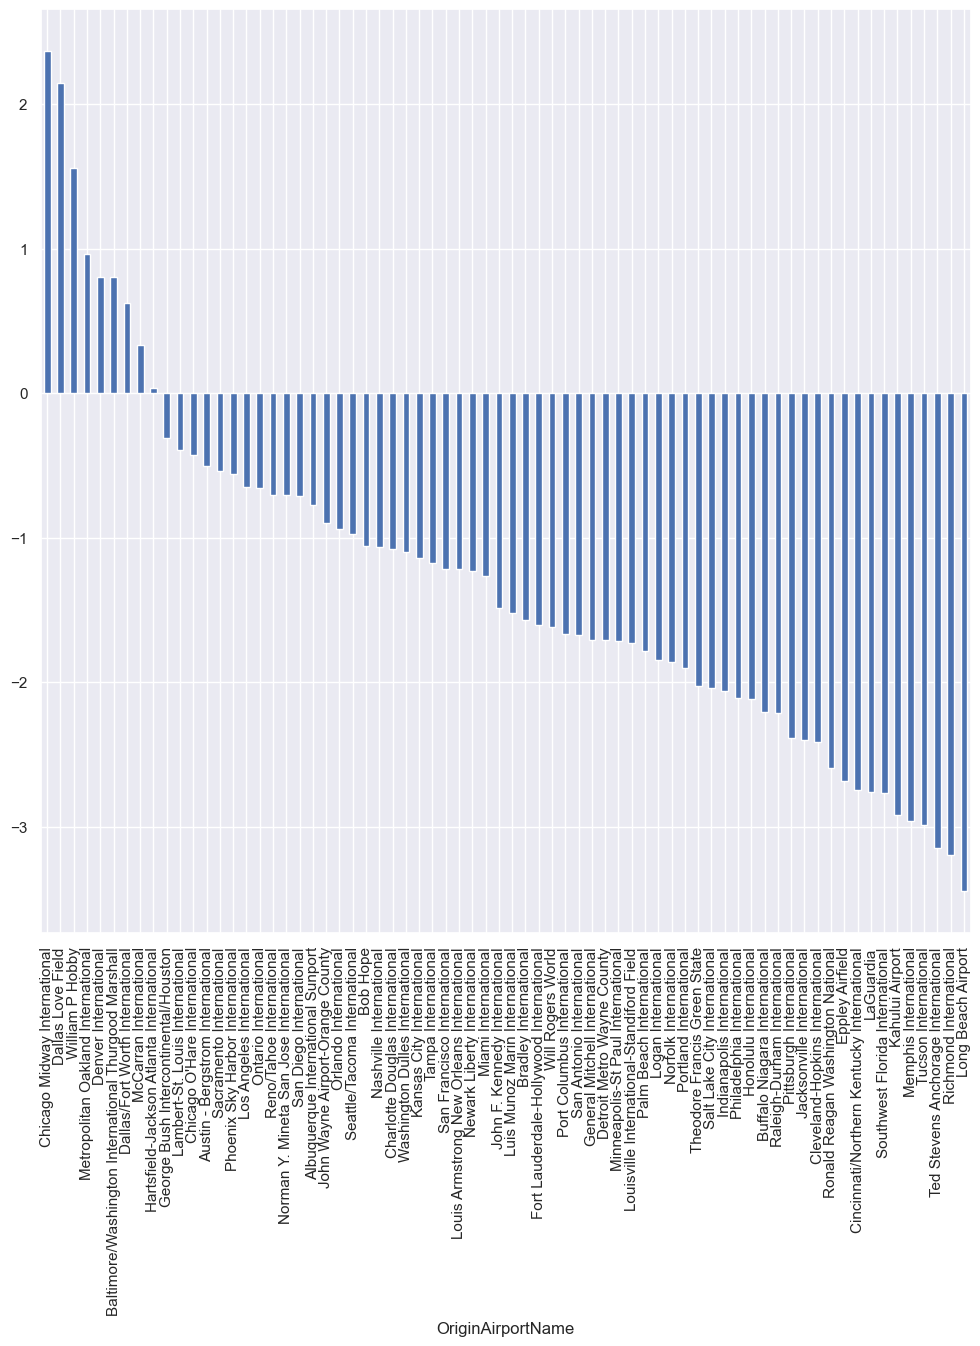

In [65]:
df.groupby(['OriginAirportName'])['DepDelay'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(12,12))

Do late departures tend to result in longer arrival delays than on-time departures?

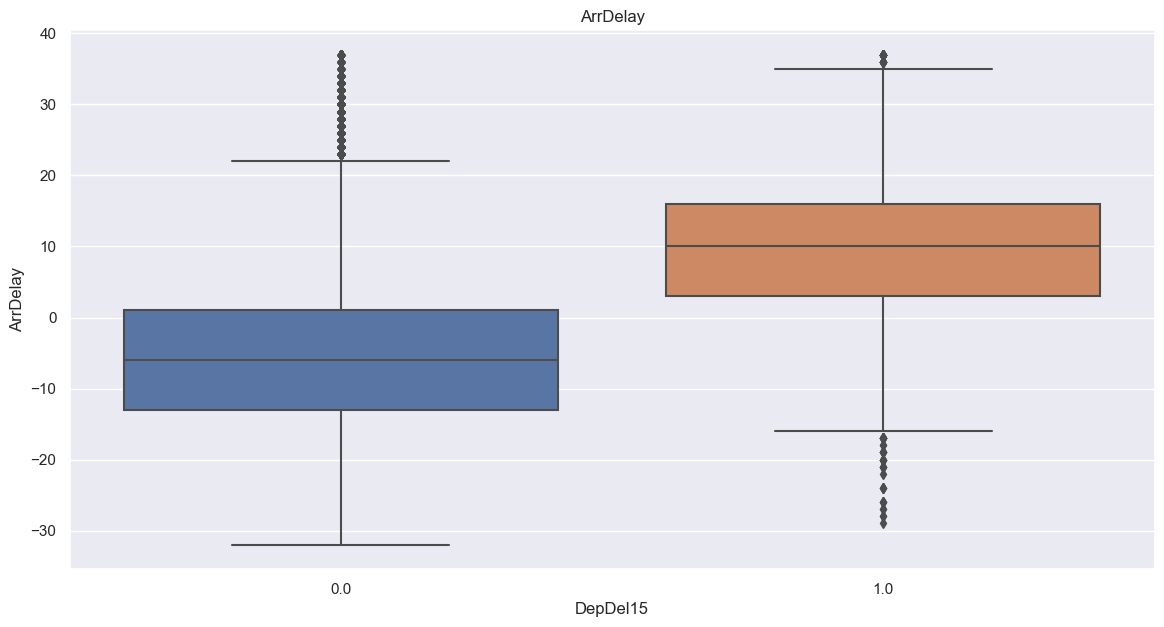

In [66]:
plt.figure(figsize=(14,7))
sns.boxplot(data=df,x='DepDel15',y=feature)
plt.title(feature)
plt.show()

Which route (from origin airport to destination airport) has the most late arrivals?

In [67]:
## Add routes
routes = pd.Series(df['OriginAirportName'] + '>' + df['DestAirportName'])
routes

0         Tampa International>John F. Kennedy International
1         Pittsburgh International>Chicago Midway Intern...
2         Seattle/Tacoma International>Ronald Reagan Was...
4         Norfolk International>Hartsfield-Jackson Atlan...
6         Metropolitan Oakland International>William P H...
                                ...                        
271932                 Denver International>William P Hobby
271933    Chicago O'Hare International>Philadelphia Inte...
271934    Dallas/Fort Worth International>Orlando Intern...
271935      Orlando International>Los Angeles International
271938               Kahului Airport>Honolulu International
Length: 214397, dtype: object

In [68]:
df1 = pd.concat([df,routes],axis=1)
df1.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,...,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled,0
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,...,New York,NY,1539,4,0.0,1824,13,0,0,Tampa International>John F. Kennedy International
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,...,Chicago,IL,710,3,0.0,740,22,1,0,Pittsburgh International>Chicago Midway Intern...
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,...,Washington,DC,810,-3,0.0,1614,-7,0,0,Seattle/Tacoma International>Ronald Reagan Was...
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,...,Atlanta,GA,545,-1,0.0,728,-9,0,0,Norfolk International>Hartsfield-Jackson Atlan...
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,...,Houston,TX,630,-1,0.0,1210,-3,0,0,Metropolitan Oakland International>William P H...


In [70]:
df1.rename(columns={0:'Routes'},inplace=True)

In [71]:
df1.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,...,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled,Routes
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,...,New York,NY,1539,4,0.0,1824,13,0,0,Tampa International>John F. Kennedy International
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,...,Chicago,IL,710,3,0.0,740,22,1,0,Pittsburgh International>Chicago Midway Intern...
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,...,Washington,DC,810,-3,0.0,1614,-7,0,0,Seattle/Tacoma International>Ronald Reagan Was...
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,...,Atlanta,GA,545,-1,0.0,728,-9,0,0,Norfolk International>Hartsfield-Jackson Atlan...
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,...,Houston,TX,630,-1,0.0,1210,-3,0,0,Metropolitan Oakland International>William P H...


In [73]:
df1.groupby(['Routes'])['ArrDel15'].sum().sort_values(ascending=False)

Routes
San Francisco International>Los Angeles International                    90
Los Angeles International>San Francisco International                    69
LaGuardia>Hartsfield-Jackson Atlanta International                       68
Los Angeles International>John F. Kennedy International                  52
LaGuardia>Charlotte Douglas International                                51
                                                                         ..
Logan International>Austin - Bergstrom International                      0
Logan International>Memphis International                                 0
Logan International>Port Columbus International                           0
San Diego International>Cincinnati/Northern Kentucky International        0
Louis Armstrong New Orleans International>San Francisco International     0
Name: ArrDel15, Length: 2479, dtype: int64

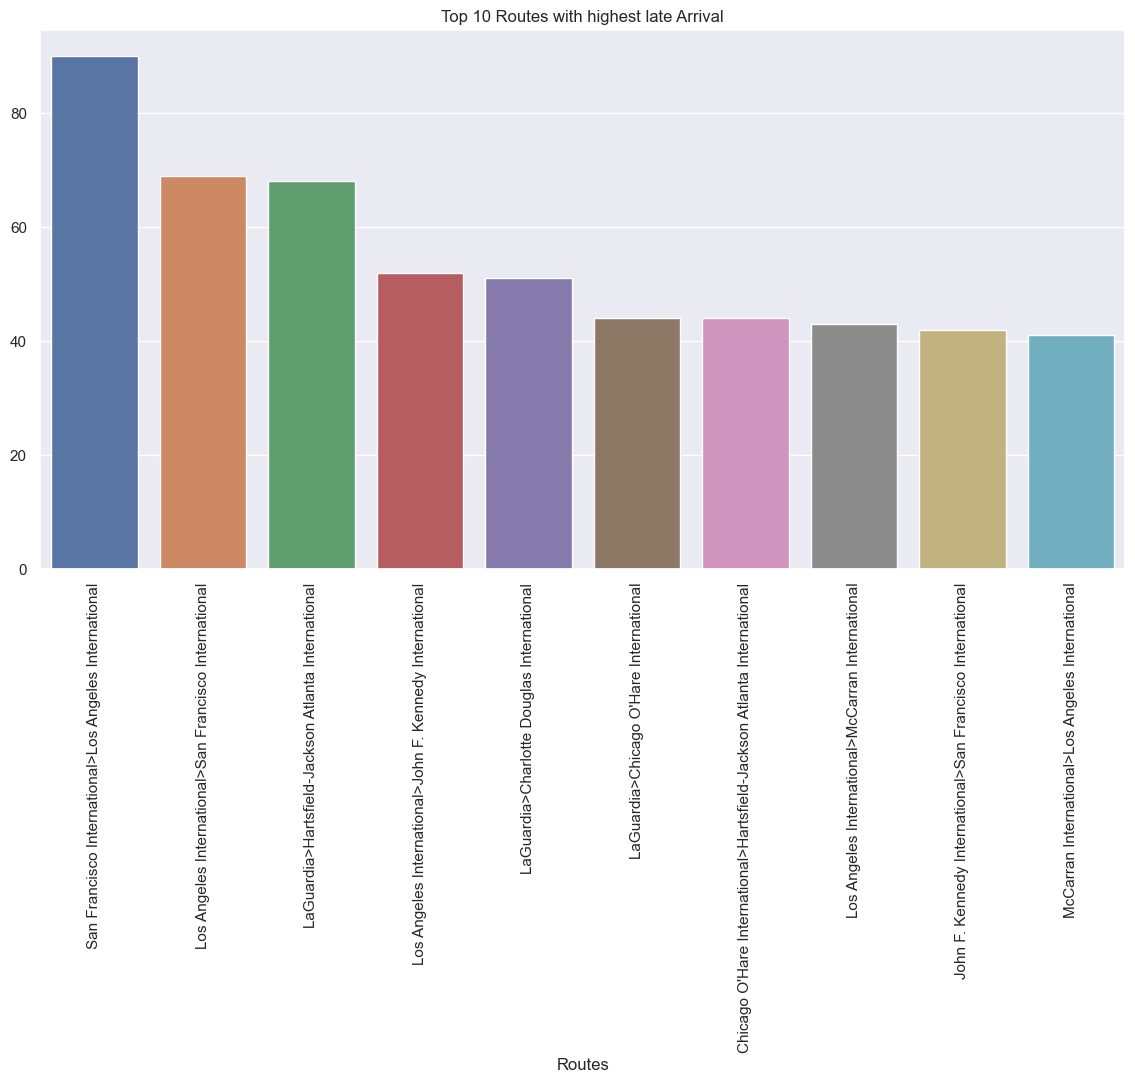

In [83]:
## Ploting top 10
route_name = df1.groupby(['Routes'])['ArrDel15'].sum().sort_values(ascending=False)[:10].index
highest_route_delay  = df1.groupby(['Routes'])['ArrDel15'].sum().sort_values(ascending=False)[:10].values
plt.figure(figsize=(14,7))
sns.barplot(x = route_name, y = highest_route_delay)
plt.title('Top 10 Routes with highest late Arrival')
plt.xticks(rotation=90)
plt.show()

Which route has the highest average arrival delay?

In [75]:
df1.groupby(['Routes'])['ArrDelay'].mean().sort_values(ascending=False)

Routes
Louis Armstrong New Orleans International>Ronald Reagan Washington National    24.500000
Cleveland-Hopkins International>Palm Beach International                       18.000000
John F. Kennedy International>Louisville International-Standiford Field        18.000000
Cleveland-Hopkins International>Philadelphia International                     12.800000
Memphis International>Denver International                                      9.758621
                                                                                 ...    
Lambert-St. Louis International>Cleveland-Hopkins International               -20.000000
Eppley Airfield>LaGuardia                                                     -20.750000
Denver International>Kahului Airport                                          -22.666667
Jacksonville International>Chicago Midway International                       -24.125000
Indianapolis International>Logan International                                -26.000000
Name: ArrDelay

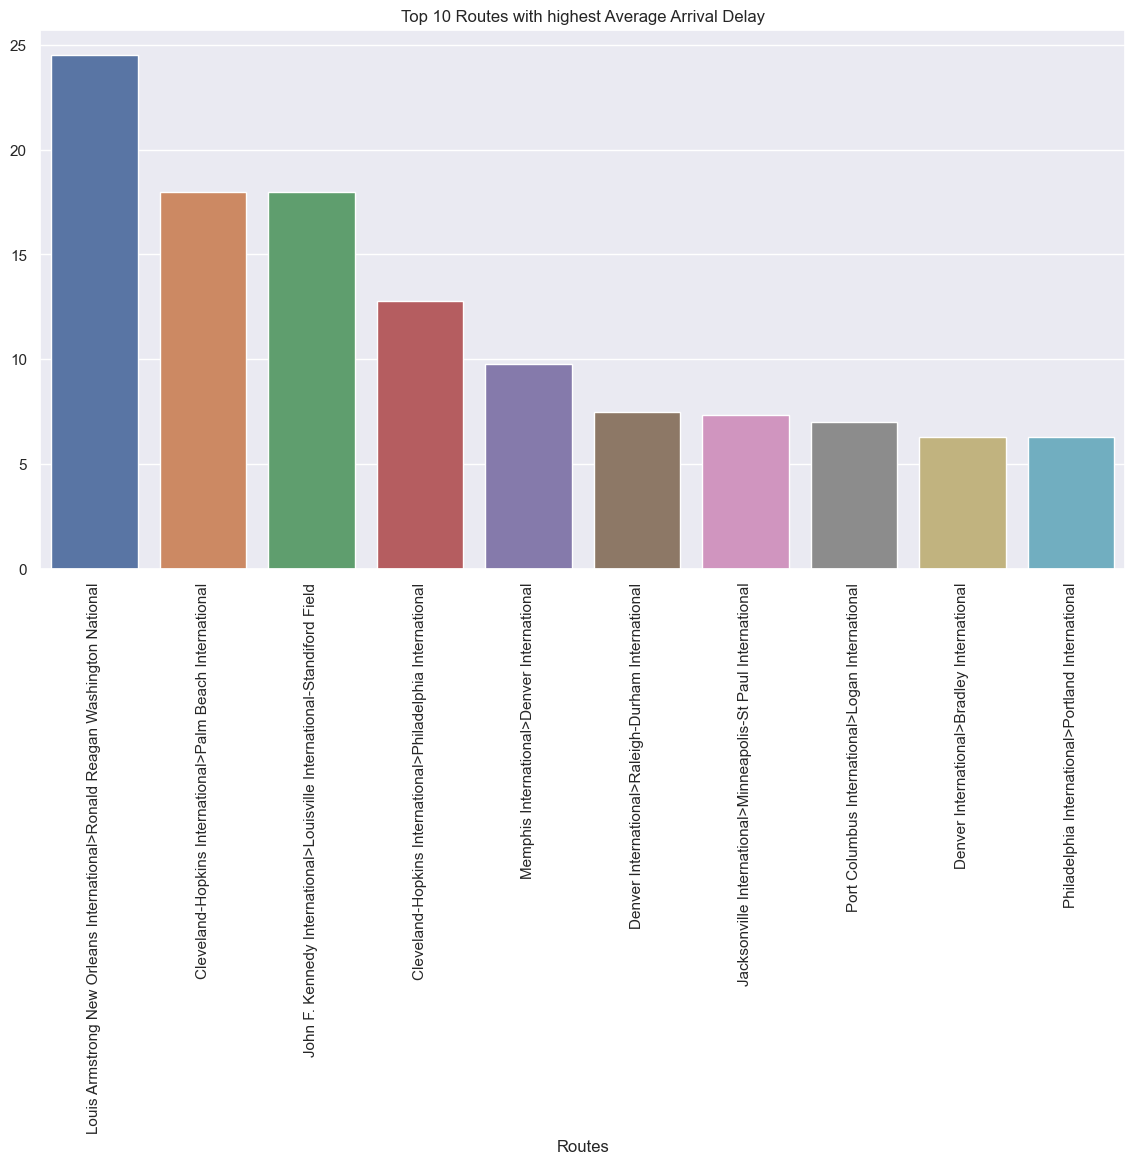

In [84]:
## Ploting top 10
route_name = df1.groupby(['Routes'])['ArrDelay'].mean().sort_values(ascending=False)[:10].index
highest_route_delay  = df1.groupby(['Routes'])['ArrDelay'].mean().sort_values(ascending=False)[:10].values
plt.figure(figsize=(14,7))
sns.barplot(x = route_name, y = highest_route_delay)
plt.title('Top 10 Routes with highest Average Arrival Delay')
plt.xticks(rotation=90)
plt.show()